In [49]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import gamma, kde, kstest
from numpy import inf




%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)
data_path = "C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Gmail_df.csv"
data0 = pd.read_csv(data_path)
data_path_write = 'C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\'

In [50]:
data = data0[['time','inbound_rejected_emails']]

In [51]:
data.head()

,time,inbound_rejected_emails
0,2015-03-23 00:00:00-04:00,2.0
1,2015-03-24 00:00:00-04:00,6.0
2,2015-03-25 00:00:00-04:00,6.0
3,2015-03-26 00:00:00-04:00,790.0
4,2015-03-27 00:00:00-04:00,13.0


In [52]:
data.describe()

,inbound_rejected_emails
count,1585.000000
mean,16252.656764
std,18371.095460
min,0.000000
25%,4611.000000
50%,8199.000000
75%,25108.000000
max,144169.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0B7A5BBE0>]],
      dtype=object)

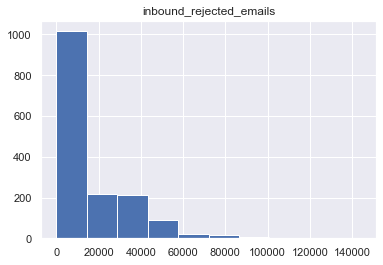

In [53]:
data.hist()

In [54]:
#data = data[(data.T != 0.0).any()]
#data = data[data['emails_sent'] != 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0B7A88E80>]],
      dtype=object)

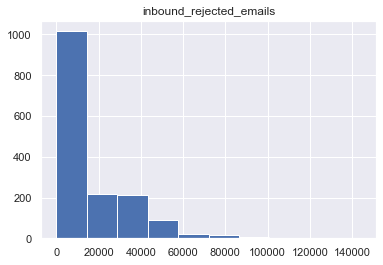

In [55]:
data.hist()

In [56]:
data.describe()

,inbound_rejected_emails
count,1585.000000
mean,16252.656764
std,18371.095460
min,0.000000
25%,4611.000000
50%,8199.000000
75%,25108.000000
max,144169.000000


In [57]:
data['time'] = pd.to_datetime(data['time'],utc=True)
data.set_index('time', inplace=True)


C:\Users\augus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Year')

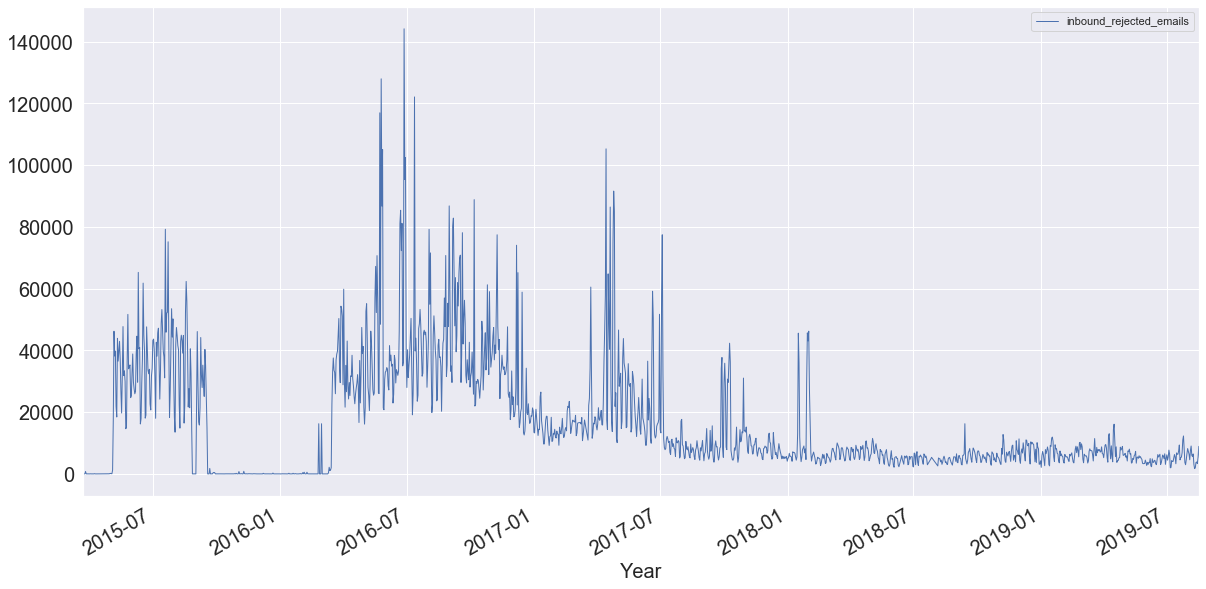

In [58]:
data.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

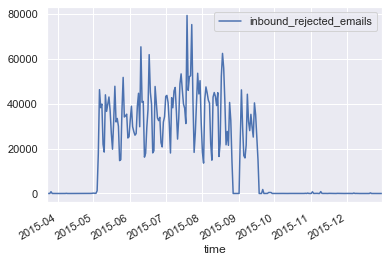

In [59]:
data.loc['2015'].plot()

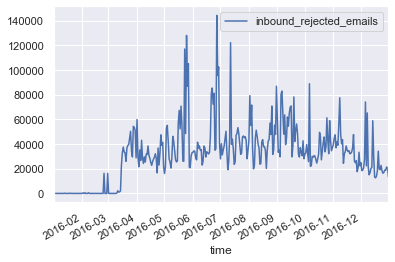

In [60]:
data.loc['2016'].plot()

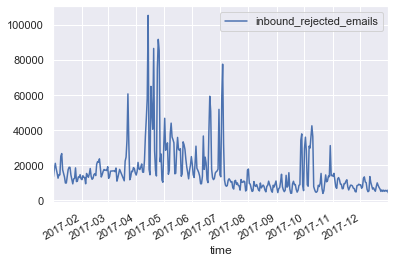

In [61]:
data.loc['2017'].plot()

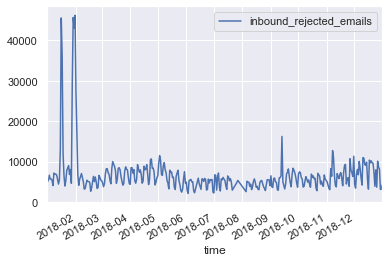

In [62]:
data.loc['2018'].plot()

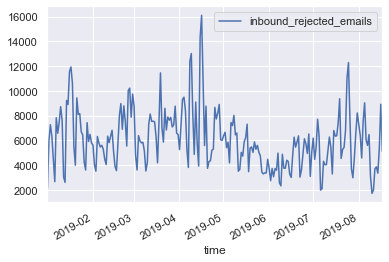

In [63]:
data.loc['2019'].plot()

In [64]:
alpha = gamma.fit(data['inbound_rejected_emails'])[0]
beta = gamma.fit(data['inbound_rejected_emails'])[1]

In [65]:
ore = data['inbound_rejected_emails']

In [66]:
density = kde.gaussian_kde(oee, bw_method=None)

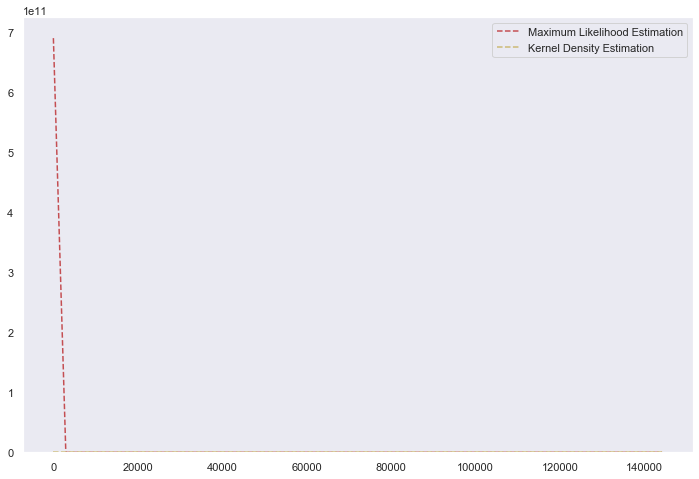

In [67]:
import numpy as np
ore.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, ore.max())
xgrid = np.linspace(x.min(), x.max(), 100)

#l1, = plt.plot(x, norm.pdf(x, alpha[-1], beta[-1]), 'm-', label="Method Of Moments")
l2, = plt.plot(x, gamma.pdf(x, alpha, beta), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l2,l3])

In [68]:
>>> my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])


In [69]:
kstest(ore,my_cdf)

KstestResult(statistic=0.11150378963731539, pvalue=1.2782611842522998e-17)

In [70]:
e = gamma(alpha,beta)

In [71]:
kstest(ore,e.cdf)

KstestResult(statistic=0.9427371761748998, pvalue=0.0)